# АСХАБАЛИЕВ АХМАД

# 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
sns.set(
    font_scale = 1.3,
    style = 'whitegrid',
    rc = {'figure.figsize': (20, 7)}
)

In [3]:
df = pd.read_excel('data.xlsx', index_col=0)
df['month'] = df.Day.dt.month

In [4]:
orders = {
    'fitting_room': ['Одежда'], 
    'hall': ['Обувь'], 
    'not': ['Сумки']
}


result = pd.DataFrame(columns=list(orders.keys()), index=[i for i in range(1,13)])
result.index.name = 'month'

a = df[df._Approved_USD > 0]

b = list(df[df.Journal_id.isin(a.Journal_id) & (df._Approved_USD == 0)].Journal_id.unique())

approved = a[~a.Journal_id.isin(b)]


groups = {}
for i in orders:
    j_id = list(df[(df._ktt2.isin(orders[i]))].Journal_id.values)
    data = df[df['Journal_id'].isin(j_id)]
    if 'Одежда' in orders[i]:
        groups[i] = data
        series_1 = groups[i][groups[i]['Journal_id'].isin(j_id)].groupby('month').Journal_id.nunique()
        series_2 = groups[i].groupby('month').Journal_id.nunique()
        result[i] = series_2
        continue
    
    
    groups[i] = data[~data.Journal_id.isin(data[~data._ktt2.isin(orders[i])].Journal_id)]
    series_1 = groups[i][groups[i]['Journal_id'].isin(j_id)].groupby('month').Journal_id.nunique()
    
    series_2 = groups[i].groupby('month').Journal_id.nunique()
    result[i] = series_1

result

,fitting_room,hall,not
month,,,
1,8787,2484,595
2,8233,2015,525
3,5707,1518,412
4,4545,1429,384
5,5312,1532,392
6,7033,1995,480
7,14628,3855,1006
8,13516,3458,779
9,6537,2309,501


In [5]:
result['all'] = df.groupby('month').Journal_id.nunique()

for i in result:
    if i == 'all': continue
    result[i] = result[i] / result['all']

result

,fitting_room,hall,not,all
month,,,,
1,0.460728,0.130243,0.031198,19072
2,0.456097,0.111628,0.029084,18051
3,0.427363,0.113674,0.030852,13354
4,0.433022,0.136147,0.036585,10496
5,0.448384,0.129315,0.033089,11847
6,0.464408,0.131735,0.031696,15144
7,0.493339,0.130012,0.033928,29651
8,0.533597,0.136518,0.030754,25330
9,0.451887,0.159616,0.034633,14466


/var/folders/gj/m0y1vs7s5kjd0hqdkyqdnwww0000gn/T/ipykernel_23482/2510202149.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['{:.0%}'.format(n) for n in ax.get_yticks()])


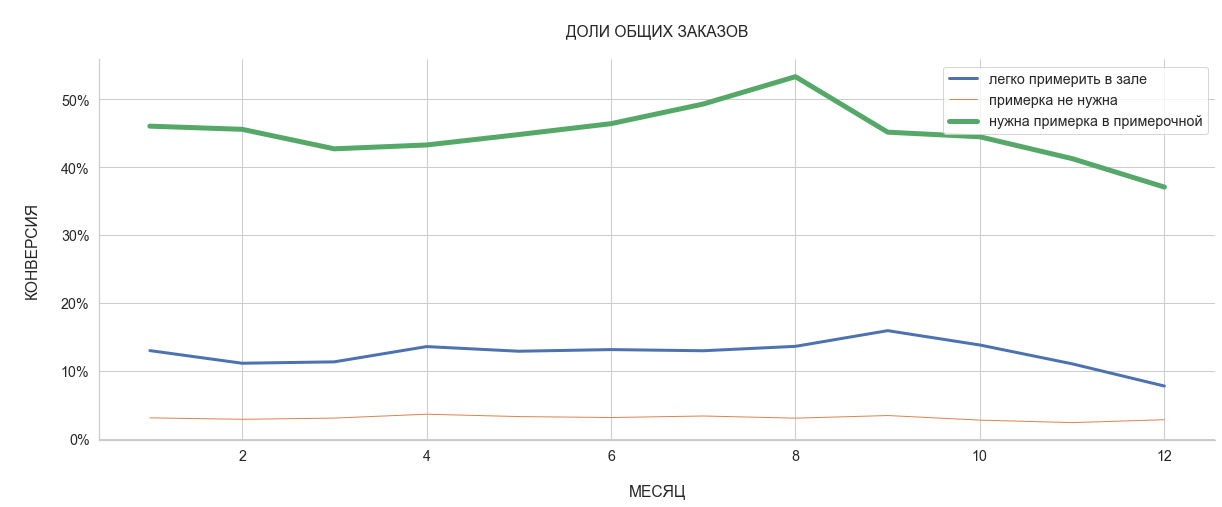

In [6]:
sns.lineplot(data=result, x='month', y='hall', label='легко примерить в зале', linewidth=3)
sns.lineplot(data=result, x='month', y='not', label='примерка не нужна', linewidth=1)
ax = sns.lineplot(data=result, x='month', y='fitting_room', label='нужна примерка в примерочной', linewidth=5, palette="Accent")

ax.set_title('\nДОЛИ ОБЩИХ ЗАКАЗОВ\n')
ax.set_ylabel('\nКОНВЕРСИЯ\n')
ax.set_xlabel('\nМЕСЯЦ')

ax.set_yticklabels(['{:.0%}'.format(n) for n in ax.get_yticks()])
sns.despine()

# 

Как мы видим из графика, большая часть заказов сосредоточена на примерку, в случае с одеждой примерочная необходима, к тому же их доля составляет почти полину от всего товара, в случае с обувью у человке есть 2 варианта, примерочная или примерка в зале

# 

# 

In [9]:
result = data.groupby(['month', 'Journal_id'], as_index=False).Journal_id.count() \
    .groupby(['month', 'Journal_id']).Journal_id.count().to_frame()

a = df[df._Net_USD == 0]

b = list(df[df.Journal_id.isin(a.Journal_id) & (df._Net_USD > 0)].Journal_id.unique())

approved = a[~a.Journal_id.isin(b)]


j_id = list(df[(df._ktt2.isin(['Обувь']))].Journal_id.values)
data = df[df['Journal_id'].isin(j_id)]

group = data[~data.Journal_id.isin(data[~data._ktt2.isin(['Обувь'])].Journal_id)]


series_1 = group.groupby(['month', 'Journal_id'], as_index=False) \
    .agg({'Journal_id': 'count', '_Approved_USD': 'sum', '_Net_USD': 'sum'})


series_1 = series_1.groupby(['month', 'Journal_id']) \
    .agg({'Journal_id': 'count', '_Approved_USD': 'sum', '_Net_USD': 'sum'}) \
    .rename(columns={'Journal_id':'cnt'})



result = series_1
result.index.names = ['month', 'orders']
result['approved'] = result['_Net_USD'] / result['_Approved_USD']
result

cnt  _Approved_USD       _Net_USD  approved
month orders                                              
1     1       1867   1.376103e+06  678444.017226  0.493018
      2        328   4.999575e+05  276912.827138  0.553873
      3        140   3.130656e+05  140070.165026  0.447415
      4         64   2.048724e+05   92410.990484  0.451066
      5         33   1.303574e+05   68180.400465  0.523027
...            ...            ...            ...       ...
12    6         11   5.640422e+04   28210.736553  0.500153
      7          6   3.298242e+04   15307.664317  0.464116
      8          2   1.328837e+04    8648.135758  0.650805
      9          4   3.197533e+04   17213.216934  0.538328
      10         1   7.487135e+03    3402.171112  0.454402

[118 rows x 4 columns]

Text(0.5, 0, '\nМЕСЯЦ')

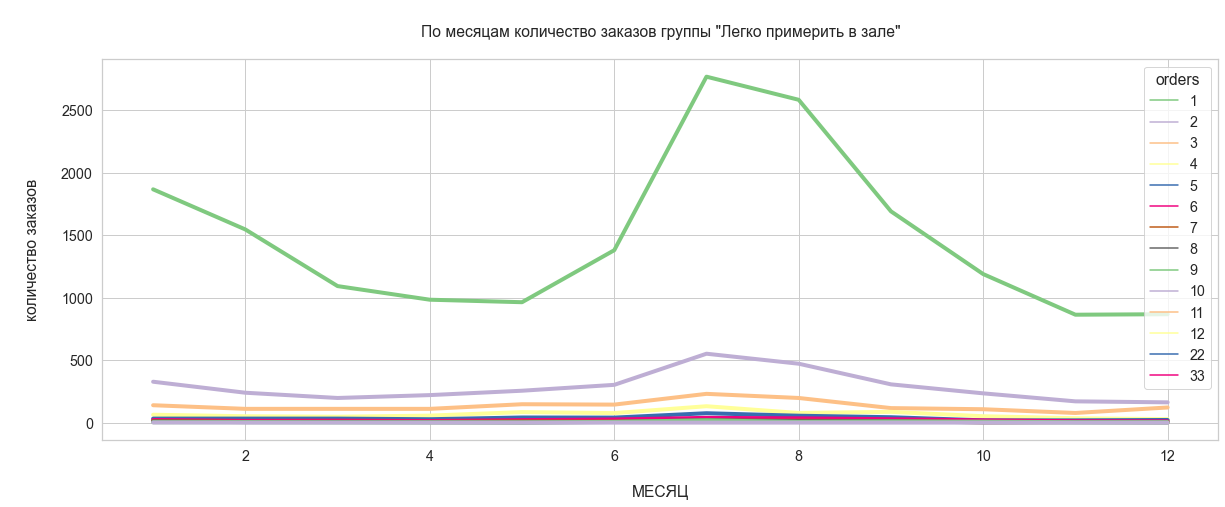

In [10]:
ax = sns.lineplot(data=result, x='month', y='cnt', hue='orders', linewidth=4, palette="Accent")

ax.set_title('\nПо месяцам количество заказов группы "Легко примерить в зале"\n')
ax.set_ylabel('\nколичество заказов\n')
ax.set_xlabel('\nМЕСЯЦ')

1 orders — 1 позиция в чеке

# 

/var/folders/gj/m0y1vs7s5kjd0hqdkyqdnwww0000gn/T/ipykernel_23482/3070746806.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['{:.0%}'.format(n) for n in ax.get_yticks()])


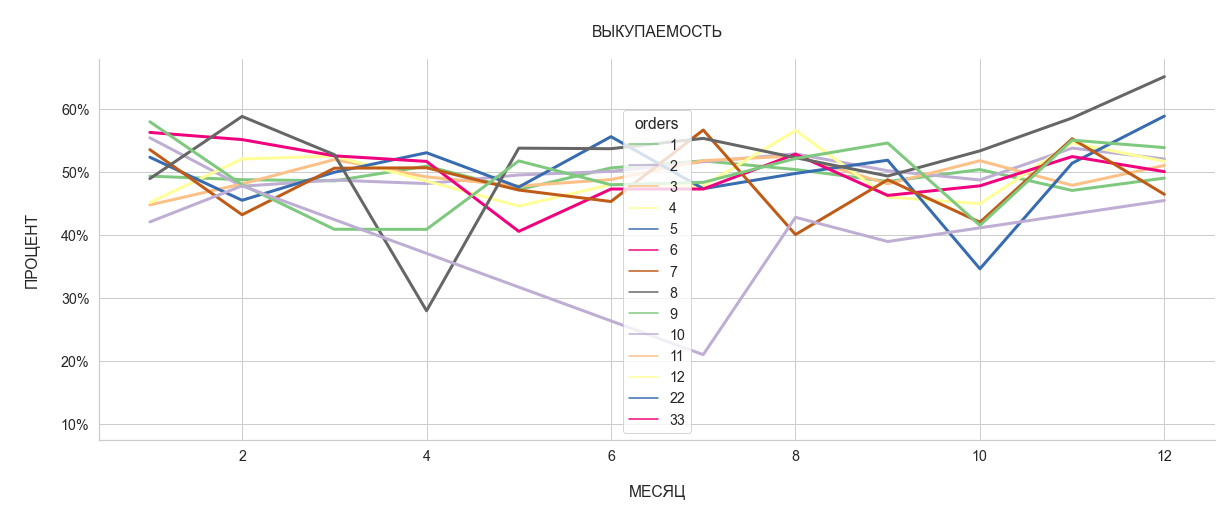

In [11]:
ax = sns.lineplot(data=result, x='month', y='approved', hue='orders', linewidth=3, palette="Accent")
ax.set_title('\nВЫКУПАЕМОСТЬ\n')
ax.set_ylabel('\nПРОЦЕНТ\n')
ax.set_xlabel('\nМЕСЯЦ')

ax.set_yticklabels(['{:.0%}'.format(n) for n in ax.get_yticks()])
sns.despine()

# 

# спасибо за внимание!

# 